### Notes and scratch pad from Python for Data Analysis, 2nd Edition, Wes McKinney

#### Chapter 2

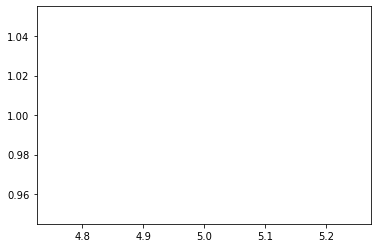

In [6]:
%matplotlib inline  # magic function that integrates matplotlib with jupyter

import matplotlib.pyplot as plt
import numpy as np

plt.plot(5,1)

In [9]:
def append_element(some_list, element):
    some_list.append(element)
    
data = [1,2,3,4]
append_element(data,5)
data

In [11]:
a = 3.5
b = 2
isinstance(a,(int,float))

True

In [18]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError:
        return False

# if x is not a list, but is iterable, convert it to a list
if not isinstance(x,list) and isiterable(x):
    x = list(x)

NameError: name 'x' is not defined

In [19]:
a = [1,2,3]
b = a   # reference to same object
a is b  # are they the same object?

True

In [20]:
c = list(a)  # creates a copy of the object and puts it into a list
c is a       # are they the same object?

False

In [21]:
c == a      # are their contents equal?

True

In [23]:
#format arg0 as a float with 2 decimal places, 
#arg1 as a string, arg2 as an integer
template = '{0:.2f} {1:s} are worth US ${2:d}' 
template.format(67.123,'Canadian dollars',30)

'67.12 Canadian dollars are worth US $30'

In [25]:
x = 5
'non-negative' if x >=0 else 'negative'

'non-negative'

### Chapter 3, data structures: tuples
Tuples and lists are semantically similar. Tuples use parantheses and lists use square brackets. The difference is that tuples are immutable. Their individual member objects may be mutable and therefore may be mutated; but the membership reference is immutable. Thus, tuples are simpler in use and much more limited in what methods may be called on them.

In [26]:
tup = (1,2,3) # this is a tuple
tup2 = tuple([1,2,3])  # this converts the list (or iterator) into a tuple
tup is tup2

False

In [27]:
tup == tup2

True

In [28]:
values = 1,2,3,4,5
a,b,*everything_else = values # conventional variable name is _ as in a,b,*_ = values
a

1

In [29]:
b

2

In [30]:
everything_else

[3, 4, 5]

In [31]:
replist = (1,2,3,1,2,1,0)
replist.count(1)

3

In [32]:
replist.count(2)

2

### Lists
Lists are often used to materialize iterators or generators

In [37]:
a = range(5)
list(a)
#tuple(a)

[0, 1, 2, 3, 4]

In [48]:
b = list(a)
b.append(5)
b

[0, 1, 2, 3, 4, 5]

In [49]:
b.pop(3)

3

In [50]:
b

[0, 1, 2, 4, 5]

In [51]:
b.insert(3,'red balloon')
b

[0, 1, 2, 'red balloon', 4, 5]

In [52]:
2 in b  # this is more expensive in lists that in dicts

True

In [53]:
2 not in b

False

In [54]:
b.append(2)
b

[0, 1, 2, 'red balloon', 4, 5, 2]

In [55]:
b.remove(2)  # removes the first instance of the value 2
b

[0, 1, 'red balloon', 4, 5, 2]

In [56]:
b + b  # this concatenates a copy of b onto b

[0, 1, 'red balloon', 4, 5, 2, 0, 1, 'red balloon', 4, 5, 2]

In [58]:
b.extend(b)  # this also concatenates a copy of b onto b, but is more efficient. use this.
b

[0,
 1,
 'red balloon',
 4,
 5,
 2,
 0,
 1,
 'red balloon',
 4,
 5,
 2,
 0,
 1,
 'red balloon',
 4,
 5,
 2,
 0,
 1,
 'red balloon',
 4,
 5,
 2]

In [64]:
c = ['abc','bc','c']  # sorts by the default function; here, alphabetically
c.sort()
c

['abc', 'bc', 'c']

In [65]:
c.sort(key=len)  # sorts by a different function; here, length
c

['c', 'bc', 'abc']

In [79]:
# to capture an index alongside a list, use the enumerate function
tracy = ['t','r','a','c','y']
mapping = {} # creating a dict
for (i,value) in enumerate(tracy):
    mapping[value] = i
mapping['a'] # where did the value 'a' appear in the list?

sorted(tracy)

import bisect
stracy = sorted(tracy)  # sorted(list) returns a sorted copy of the list
bisect.bisect(stracy,'d')  # where would 'd' be inserted to keep the list sorted?
stracy
bisect.insort(stracy,'s')  # go ahead and insert 's' in the right place
stracy

['a', 'c', 'r', 's', 't', 'y']

In [92]:
tracy = ['t','r','a','c','y']
frank = ['f','r','a','n','k']
trank = zip(tracy,frank)  # let's zip those two crazy kids together
trank = list(trank)
trank

[('t', 'f'), ('r', 'r'), ('a', 'a'), ('c', 'n'), ('y', 'k')]

In [91]:
me,him = zip(*trank)   # let's unzip that list and pull all the first elements back out
me
him

('f', 'r', 'a', 'n', 'k')

In [94]:
# two great tastes that taste great together (think data formatting)
for i,(a,b) in enumerate(zip(tracy,frank)):
    print('{0}: {1}, {2}'.format(i,a,b))

0: t, f
1: r, r
2: a, a
3: c, n
4: y, k


### dicts - hashtables

In [43]:
empty_dict = {}     # you can make an empty dict to populate later
d1 = {1:'a',2:'b'}  # you can create one with curly braces and colons
d1[7]='c'           # you can assign a new value to a new or existing key
del d1[7]           # remove by key
d1.pop(1)           # another way to remove by key, and return value
d2 = {4:'t',6:'r'} 
d1.update(d2)       # appending one dict's entries to another dict
d1.update({4:'s'})  # but watch out because repeated keys will get overwritten
d1

tracy = ('t','r','a','c','y')
frank = ('f','r','a','n','k')
trank = zip(tracy,frank)
list(trank)

# one way to create a dict from two lists
mapping = {}
for key,value in zip(tracy,frank):
    mapping[key] = value

# another way
mapping = dict(zip(tracy,frank))   # you can use the dict() function with a list of 2-tuples
mapping

# return a value or a default value
val = mapping.get('q','z')  # get the value associated with the key 'q', or return 'z'
val

# creating a dict from a default rule
# ie, creating a dict of words where the key is the first letter and the value is the
# list of words

# 3 ways - the Python long way that works
words = ('a','as','apple','bee','bat')
by_letters = {}
for word in words:
    letter = word[0]
    if letter not in by_letters:
        by_letters[letter] = [word]
    else:
        by_letters[letter].append(word)

# another way - using the setdefault dict method
for word in words:
    letter = word[0]
    by_letters.setdefault(letter,[]).append(word)
    
# one more way using a class from the collections module
from collections import defaultdict
by_letters = defaultdict(list)
for word in words:
    by_letters[word[0]].append(word)
by_letters

# keys must be immutable, so if you have a list, convert it to a tuple first
#tracy = {['t','r','a','c','y']} # doesn't work!
tracy = {tuple(['t','r','a','c','y'])} 
tracy



{('t', 'r', 'a', 'c', 'y')}

### Sets and set functions

Sets are unique, non-ordered sets of values, denoted by a comma-separated list inside curly braces

In [54]:
set1 = {1,2,2,2,3}
set1
set2 = {3,4,4,4,5}
set2
set1 & set2
set1 | set2
set1 ^ set2
set1 - set2
set1.add(4)
set1.remove(2)

### Comprehensions - filtering and defining lists, sets, dicts in one line

In [73]:
# example: convert words to uppercase if they are at least 2 letters long
# this is a LIST COMPREHENSION because it makes a list
words = {'a','as','apple','bee','bat'}
lc = [word.upper() for word in words if len(word)>2]
lc

# let's make a dict comprehension
dc = {word[0] : word for word in words if len(word)>2}  # note this doesn't make a list of words as a value, just the latest one
dc

# set comprehension is like a list comprehension but creates a set
words = ['a','as','apple','apple','bee','bat']
lc = [word.upper() for word in words if len(word)>2]
lc  # this gives you duplicates of APPLE because it's a list
sc = {word.upper() for word in words if len(word)>2}
sc  # this gives you one APPLE because it's a set

# we can go nuts with it...
# two lists of names, together in a list
names1 = ['tracy','frank']
names2 = ['jonas','trey','kit']
family = [names1,names2]
family
# let's make a list of all names with 'r' in them
r_names = []
for groups in family:
    r_people = [name for name in groups if name.count('r')>=1]
    r_names.extend(r_people)
r_names

# a crazy one-liner version!
# this says...
# for groups in family, for name in groups, if name has an 'r', then it's part of the list

r_names = [name for groups in family for name in groups if name.count('r')>=1 ]
r_names

short_names = [name for groups in family for name in groups if len(name)<5]
short_names

# you can use this idea to "flatten" a list of lists or tuples, eg
some_tuples = [(1,2,3),(4,5,6),(7,8,9)]
[x for tuple in some_tuples for x in tuple]
# just think of it as taking the expanded form of nested for and if statements,
# and collapsing them onto a single line

# you can also use a comprehension inside a comprehension, eg
[[x for x in tuple] for tuple in some_tuples]
# this produces a tuple of tuples rather than a flattened tuple of lists as before

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

### functions as objects
Treating functions as objects means you can use them as arguments in a couple handy ways

In [76]:
# say we want to apply a series of cleaning operations to a list of strings (like
# user input data)
clean_op1 = str.strip # removes whitespace
clean_op2 = str.title # capitalizes the first letter and lowercases the rest

import re
# now we want to build a custom function that removes !, #, and ? from the string
def remove_punctuation(value):
    return re.sub('[!#?]','',value)

clean_op3 = remove_punctuation
clean_ops = [clean_op1, clean_op2, clean_op3]

# let's write a function that applies a list of cleaning operatinos to a set of strings
def clean_strings(strings,ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result

sample_strings = ['tracy?','  frank!   ','TREY']
clean_strings(sample_strings,clean_ops)


['Tracy', 'Frank', 'Trey']

### Lambda (anonymous) functions

In [80]:
def short_function(x):
    return x*2

equiv_lambda = lambda x: x*2

# you can use these to pass a short function to another function, or to define
# a custom sort function, etc

# custom sort function - say you wanted to sort a list of strings by the number
# of distinct letters in each string
# then you want to sort by len(set(list(word)))
# you can pass that function to the sort operator:
words = ['aaaa','tracy','abc','bbaabbaabbaa']
words.sort(key=lambda x:len(set(list(x))))
words

['aaaa', 'bbaabbaabbaa', 'abc', 'tracy']

### Generators create a list one element at a time

In [81]:
def squares(n=10):
    print('Generating squares:')
    for i in range(1,n+1):
        yield i**2

gen = squares()   # this just defines gen but does not call the function

# you have to request elements from gen for it to start working, like this:
for n in gen:
    print(n,end=' ')


Generating squares:
1 4 9 16 25 36 49 64 81 100 

In [87]:
# you can also use a generator expression, like:
gen = (x**2 for x in range(10))
for y in gen:
    print(y,' ')

sumsquares = sum(i**2 for i in range(10))
sumsquares
dict((i,i**2) for i in range(1,11))  # constructing a dict by generating a list of 2-tuples

0  
1  
4  
9  
16  
25  
36  
49  
64  
81  


{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81, 10: 100}

### Exception Handling

In [89]:
# catch exceptions and/or do stuff regardless
try:
    #the stuff you are going to try
    pass
except:
    #catches any exception. to specify exception types, use a comma separated list
    #as in except (Type1, Type2)
    pass
else:
    #what if there were no exceptions? then do this stuff
    pass
finally:
    #regardless, do this stuff
    #like closing a file if you've opened it
    pass

### Files in Python

In [1]:
# easy to open files, default is read-only
# use the 'with' command to ensure the file is closed after being used
path = '/dir/to/file.txt'
with open(path) as file:
    lines = [lines.rstrip() for line in file]
# this gives you a list of the lines in the file, with newline removed, and closes the file

FileNotFoundError: [Errno 2] No such file or directory: '/dir/to/file.txt'

In [ ]:
# open(path) - opens file read-only
# open(path,'w') - creates a new file for writing at that path
# open(path,'x') - creates a new file for writing at that path unless it already exists
# open(path,'a') - appends to the file
# open(path,'r+') - opens for read/write# file = open(path)
# file.read(24) - reads 24 characters or bytes if opened with 'rb'
# file.tell() - tells you which byte the file handle is sitting at
# file.seek(3) - moves to the 3rd byte in the file
# file.close()

# use 'write' and 'writelines' to write to a file, eg
# with open(outfile) as outfile:
#     outfile.writelines(line for lines in open(infile) if len(line)>1)

### Chapter 4 - NumPy

In [9]:
import numpy as np
data = np.random.randn(2,3)
data * 100
data.shape
data.dtype

dtype('float64')

In [30]:
# you can convert any list type object to an array
mylist = [1,2,4,5,3]
myarray = np.array(mylist)

# a list of lists becomes a multidimensional array
mylist2 = [[1,2,3],[4,5,6]]
myarray2 = np.array(mylist2)
myarray2.shape # 'rows' by 'columns', if you will
myarray2.ndim  # how many dimensions?

# special functions
np.ones(10)
np.ones((2,3))
np.ones_like(myarray2)
np.zeros(4)
np.zeros_like(myarray)
np.empty((4,3))
count_to_100 = np.arange(100)

# converting string data representing numbers, to actual numbers:
numstring = ['1.2','3.4','5']
numarray = np.array(numstring)
numarray.dtype
floatarray = numarray.astype(float)
floatarray.dtype

dtype('float64')

In [42]:
# indexing and slicing
# slicing is similar to Python list slices except that they are NOT copies,
# but rather reference the original. example:
arr = np.array([1,2,3,4,5,6,7])
arr_slice = arr[2:4]
arr_slice[:] = 1
arr

# you can index and slice in many dimensions at once
# note: indices in the form [a][b] are equivalent to [a,b]
arr2dim = np.array([[1,2,3],[4,5,6]])
arr2dim[1][2] == arr2dim[1,2]

True

In [74]:
# you can use boolean arrays to index data
names = np.array(['tracy','frank','trey','jonas','kit','tracy'])
names == 'tracy'  # generates an array of boolean data; use this as an index
data = np.random.randn(6,5)
data[names=='tracy']
# same as
cond = names=='tracy'
data[cond]

data[data<0] = 0   # using another boolean array as an index
data[names == 'tracy',2:]  # combine boolean indices with slices
data[names != 'tracy'] = 3  # using nots in boolean expressions
# note you cannot use 'and' or 'or' in boolean arrays, you have to use & or |
data[(names=='tracy') | (names=='frank')] = 5
data

array([[5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [5., 5., 5., 5., 5.]])

In [82]:
# fancy indexing
# you can grab rows (or columnns) in a specified order by listing them in the order
# you want, comma-separated
# arr[1,2] means give me the element at arr[1][2]
# but arr[[1,2]] means give me the rows 1 and 2
# example
arr44 = np.empty((4,4))
for i in range(4):
    arr44[i] = i
arr44
# to grab the element at arr44[2][1], i can use:
arr44[2,1]
# or
arr44[2][1]
# but to grab the rows 2 and 1 in that order, i can use:
arr44[[2,1]]
# you can do this in multiple dimensions, and it will zip the entries into tuples, eg
# to grab the rows 2 and 1, and from them the entries in col 0 and 2 respectively, do:
arr44[[2,1],[0,2]]
# you can use slices with either index
arr44[[2,1],:2]

array([[2., 2.],
       [1., 1.]])

In [87]:
# reshape & transpose
# each array has a .T which is its transpose
arr = np.random.randn(2,5)
arr.shape
arr.T.shape

# .T is swapping axes. there is another function 'swapaxes' you can use to complicate things
arr.swapaxes(0,1) # gives you the .T function back

# you can swapaxes WHILE doing a transpose with the .transpose function
arr3 = np.random.randn(2,3,4) #gives you a 2x3x4
arr3
arr3.transpose(1,0,2) # gives you a 3x2x4

array([[[ 0.34615911,  0.91097707, -0.37619436, -0.46455798],
        [-0.69705139,  0.8615842 ,  1.28017283,  0.19260945]],

       [[-0.0667617 , -2.41878239, -0.40899126, -1.03365272],
        [-0.5855713 , -0.70242485,  1.82868785,  0.28184484]],

       [[-1.23394265,  0.85220771,  0.91435125,  2.22319359],
        [-0.10239384, -0.98158321, -0.74601724, -0.01914172]]])